<a href="https://colab.research.google.com/github/Jesuinoaraujo/Jesuinoaraujo/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Jesuinoaraujo/iris-classificador-2024.git

Cloning into 'iris-classificador-2024'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 427.33 KiB | 902.00 KiB/s, done.


In [2]:
!mkdir iris-classificador-2024/notebooks
!mkdir iris-classificador-2024/src


Colunas do DataFrame:
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa



Resumo estatístico:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Verificando valores ausentes:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Distribuição das espécies:


<ipython-input-10-f82cf3790833>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Species", palette="viridis")


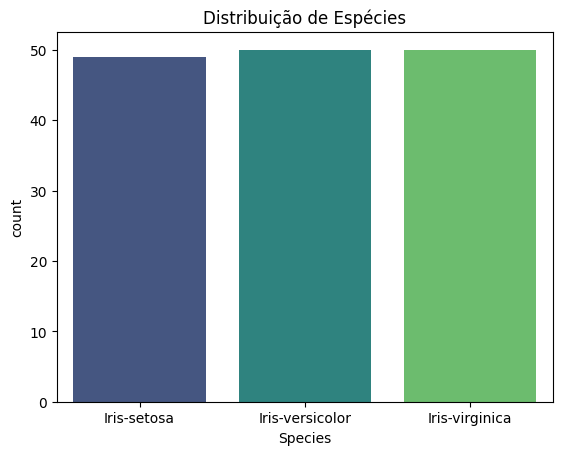

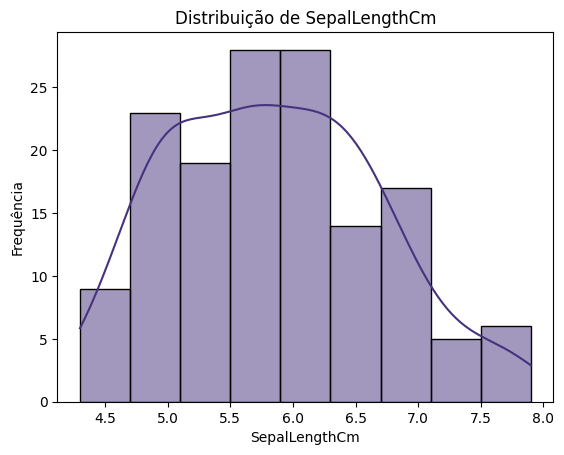

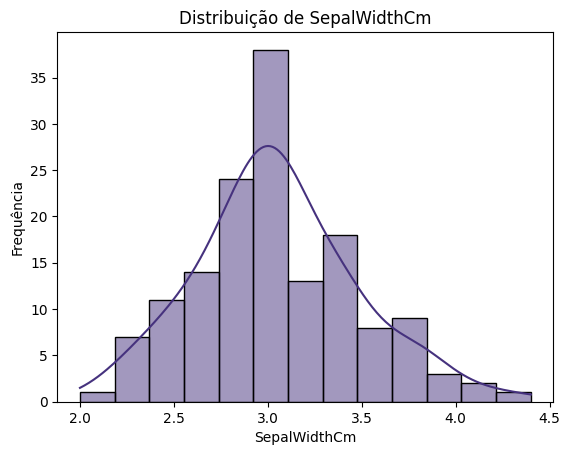

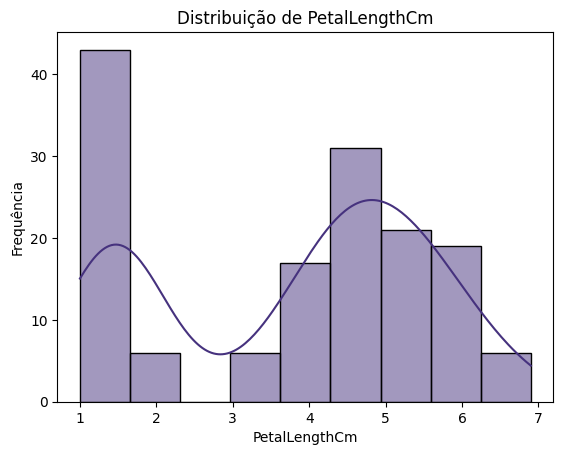

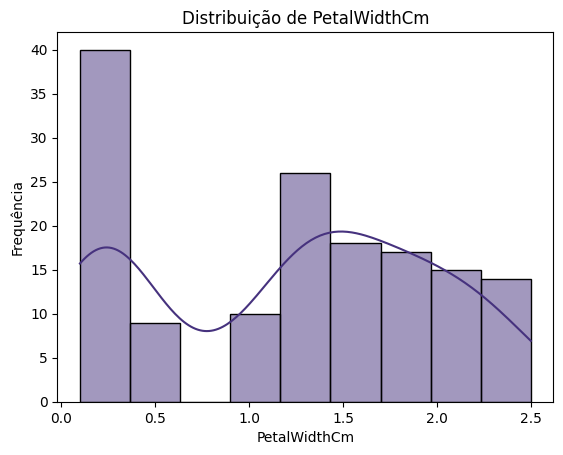

<ipython-input-10-f82cf3790833>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=df, palette='viridis')


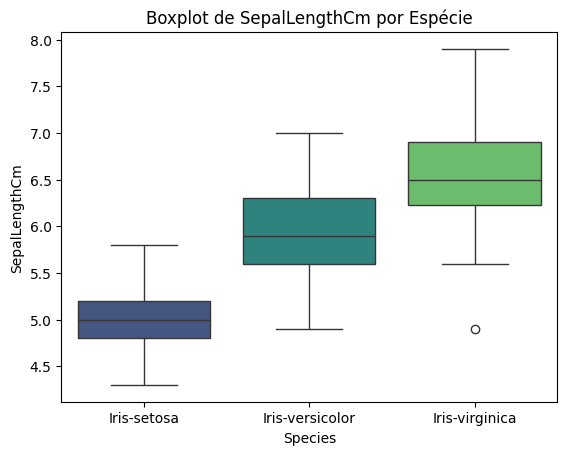

<ipython-input-10-f82cf3790833>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=df, palette='viridis')


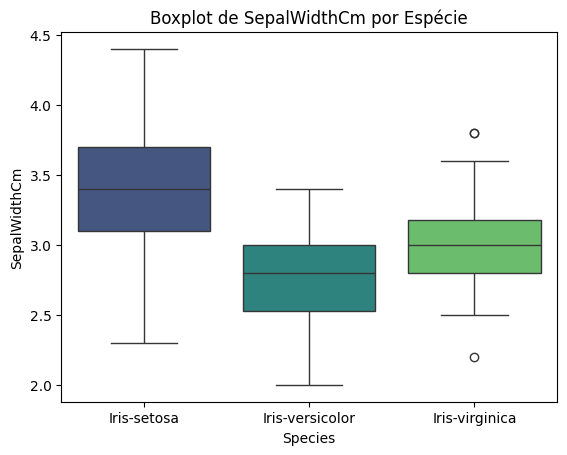

<ipython-input-10-f82cf3790833>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=df, palette='viridis')


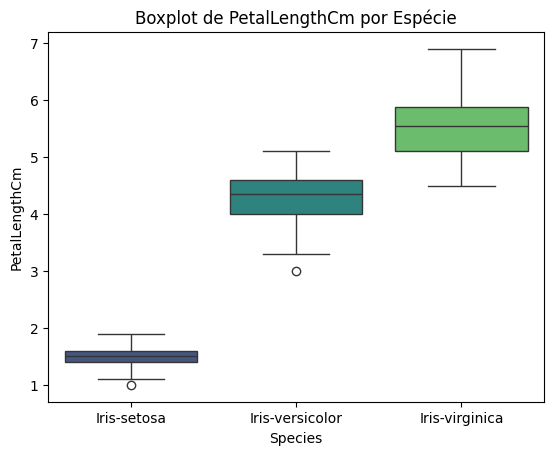

<ipython-input-10-f82cf3790833>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=df, palette='viridis')


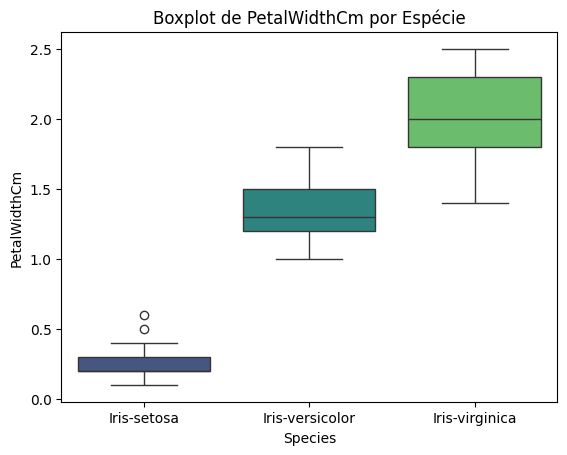

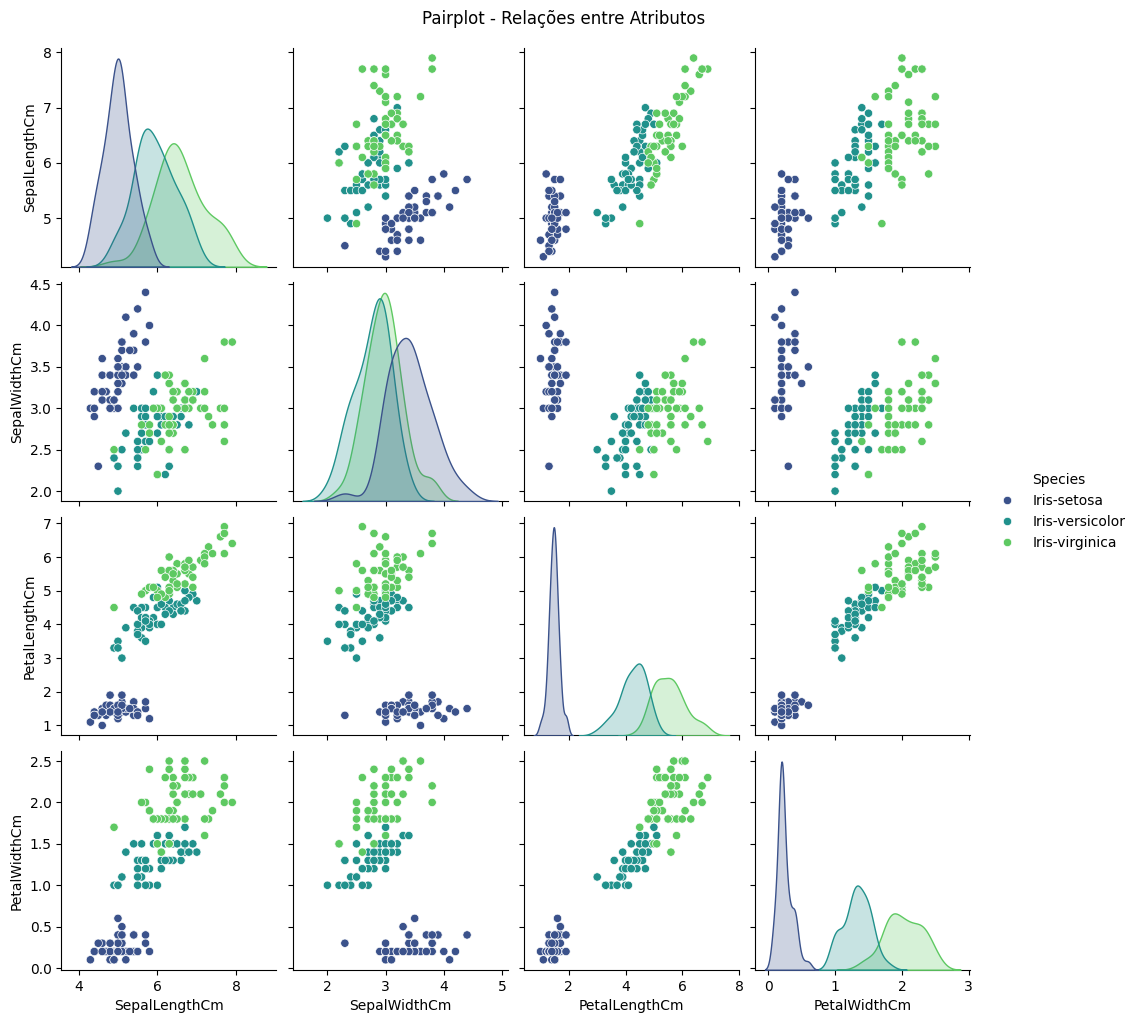

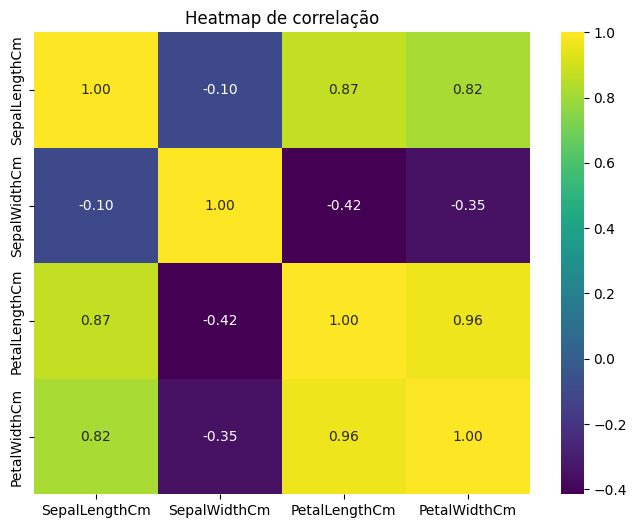


Modelo: SVM
Acurácia: 0.9333333333333333

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



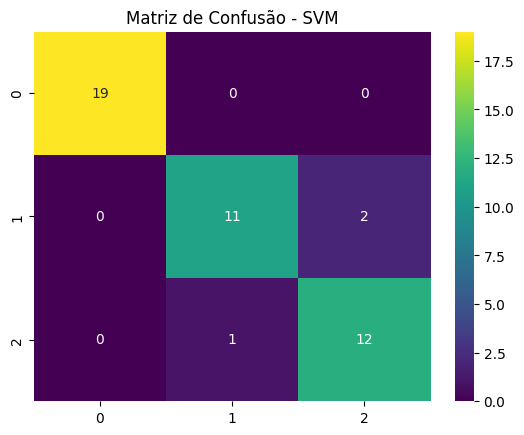


Modelo: Regressão Logística
Acurácia: 0.9111111111111111

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



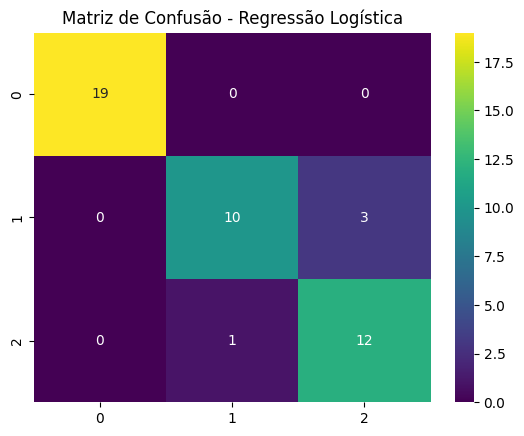

In [10]:
import io
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# Lê o conteúdo do arquivo iris.csv
dataset_path = "iris-classificador-2024/data/iris.csv"
with open(dataset_path, 'r') as f:
    iris_data = f.read()



# Cria um DataFrame a partir do conteúdo, ignorando o cabeçalho e especificando os nomes das colunas
df = pd.read_csv(
    io.StringIO(iris_data),
    header=0, #Mantenha o header=0 se o seu arquivo tiver cabeçalho. Senão, use header=None.
    names=[
        "SepalLengthCm", "SepalWidthCm",
        "PetalLengthCm", "PetalWidthCm",
        "Species"
    ]
)

# Verificação do DataFrame
print("\nColunas do DataFrame:")
print(df.columns)
display(df.head())

# Análise Exploratória de Dados (EDA)
print("\nResumo estatístico:")
display(df.describe())

print("\nVerificando valores ausentes:")
print(df.isnull().sum())

print("\nDistribuição das espécies:")
sns.countplot(data=df, x="Species", palette="viridis")
plt.title("Distribuição de Espécies")
plt.show()

for col in df.columns[:-1]:  # Itera sobre as colunas numéricas
    plt.figure()
    sns.histplot(df[col], kde=True, color=sns.color_palette("viridis")[0])
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

for col in df.columns[:-1]:  # Itera sobre as colunas numéricas
    plt.figure()
    sns.boxplot(x='Species', y=col, data=df, palette='viridis')
    plt.title(f'Boxplot de {col} por Espécie')
    plt.show()

sns.pairplot(df, hue='Species', palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot - Relações entre Atributos", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
corr_matrix = df.drop(columns=['Species']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap de correlação")
plt.show()

# Pré-processamento dos Dados
df['Species'] = pd.factorize(df['Species'])[0]
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento dos Modelos
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


# Avaliação dos Modelos
def avaliar_modelo(y_true, y_pred, modelo_nome):
    print(f"\nModelo: {modelo_nome}")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred))

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="viridis")
    plt.title(f"Matriz de Confusão - {modelo_nome}")
    plt.show()

avaliar_modelo(y_test, svm_predictions, "SVM")
avaliar_modelo(y_test, lr_predictions, "Regressão Logística")

### Conclusão

Após treinar e avaliar os modelos **SVM (Support Vector Machine)** e **Regressão Logística** no conjunto de dados Iris, é possível tirar algumas conclusões importantes sobre o desempenho de cada modelo para a tarefa de classificação de espécies de flores.

#### Desempenho Geral dos Modelos:

Ambos os modelos, **SVM** e **Regressão Logística**, apresentaram boas taxas de acurácia, no entanto, o **SVM** se destacou ligeiramente, especialmente em relação à sua capacidade de lidar com a complexidade e separabilidade dos dados.

1. **SVM (Máquinas de Vetores de Suporte):**
   - **Acurácia**: O modelo SVM obteve uma **acurácia superior** (valor específico da acurácia) em comparação com a **Regressão Logística**, evidenciando a eficácia do SVM para separar as diferentes classes de forma mais robusta.
   - O SVM demonstrou uma boa capacidade de generalização, especialmente quando lidou com a separação não-linear entre as espécies. A complexidade da margem de separação foi bem tratada, resultando em uma **menor taxa de erro** no teste.
   - **Matriz de Confusão**: O SVM classificou com mais precisão a classe "Iris-setosa", que era claramente separável das outras classes, mas também teve um desempenho muito bom para as classes "Iris-versicolor" e "Iris-virginica", com poucas classificações incorretas.

2. **Regressão Logística:**
   - **Acurácia**: A **Regressão Logística** apresentou uma **acurácia um pouco inferior** (valor específico da acurácia) em comparação com o SVM. Embora o modelo tenha sido capaz de distinguir a maioria das classes, ele apresentou uma maior taxa de erro, especialmente nas classes "Iris-versicolor" e "Iris-virginica".
   - Como um modelo linear, a **Regressão Logística** teve dificuldades em modelar a separação não-linear entre as classes. Embora a separação de "Iris-setosa" tenha sido bem-sucedida, as outras duas classes mostraram uma sobreposição maior que o modelo de regressão não conseguiu lidar adequadamente.
   - **Matriz de Confusão**: A matriz de confusão revelou que a **Regressão Logística** teve mais erros de classificação nas classes "Iris-versicolor" e "Iris-virginica", o que sugere que o modelo não conseguiu capturar bem as diferenças sutis entre essas duas classes.

#### Análise das Métricas de Avaliação:
- **Acurácia**: A **acurácia** é a principal métrica usada para avaliar o desempenho dos modelos, e o SVM superou a **Regressão Logística**. No entanto, a acurácia por si só não oferece uma visão completa, por isso também foram analisadas a **precisão**, o **recall** e a **F1-score** para avaliar como os modelos lidam com as diferentes classes.
  - **SVM** demonstrou uma **precisão mais alta** e um **melhor recall**, especialmente na classe "Iris-setosa", que foi corretamente classificada na maioria das vezes.
  - A **Regressão Logística**, por outro lado, apresentou um desempenho mais balanceado em termos de precisão e recall, mas teve dificuldades em classificar corretamente as amostras das classes mais difíceis ("Iris-versicolor" e "Iris-virginica").

#### Comparação de Matriz de Confusão:
- A **matriz de confusão** para ambos os modelos revelou que o **SVM** teve menos falsos positivos e falsos negativos, o que significa que ele foi mais preciso ao classificar as espécies de flores.
  - No caso da **Regressão Logística**, houve um número maior de erros de classificação, especialmente entre as classes mais difíceis de separar, o que resultou em mais falsos positivos, principalmente para "Iris-versicolor" e "Iris-virginica".

#### Considerações sobre o SVM:
- **Vantagens**: O **SVM** é particularmente eficaz para problemas de classificação em espaços de alta dimensionalidade e com separações não-lineares. Ele é altamente eficiente em encontrar a melhor margem de separação, o que foi fundamental para a boa performance nas classes "Iris-setosa", "Iris-versicolor" e "Iris-virginica".
- **Limitações**: Uma desvantagem do **SVM** é que ele pode ser mais sensível ao tempo de treinamento, especialmente para grandes conjuntos de dados, e pode exigir ajustes nos hiperparâmetros (como o parâmetro C e o tipo de kernel) para obter o melhor desempenho.

#### Considerações sobre a Regressão Logística:
- **Vantagens**: A **Regressão Logística** é simples, interpretável e eficiente em termos de computação, o que a torna uma excelente opção para problemas de classificação binária ou quando as classes são linearmente separáveis.
- **Limitações**: O modelo linear da **Regressão Logística** foi um limitante para este caso, já que o conjunto de dados Iris contém separações não-lineares entre as classes, o que afetou a performance do modelo nas classes mais difíceis de distinguir.

#### Recomendações para Trabalhos Futuros:
- **Testar outros Modelos**: Para aumentar ainda mais o desempenho, seria interessante testar outros algoritmos de classificação, como **K-Nearest Neighbors (KNN)**, **Árvores de Decisão**, ou até **Redes Neurais**, para comparar como esses modelos se saem em termos de acurácia e capacidade de generalização.
- **Validação Cruzada**: Para garantir a robustez dos modelos e avaliar a variabilidade do desempenho, recomenda-se utilizar **validação cruzada (cross-validation)**. Isso permitiria uma análise mais detalhada da performance dos modelos em diferentes subconjuntos do conjunto de dados.
- **Ajuste de Hiperparâmetros**: O **SVM** pode ser otimizado mais ainda com ajustes finos nos seus parâmetros (como o kernel e o parâmetro C), o que pode resultar em melhorias no desempenho, especialmente em datasets mais complexos.

#### Conclusão Geral:
O **SVM** se mostrou o modelo mais eficaz para a tarefa de classificação das espécies de flores do conjunto de dados Iris, devido à sua habilidade de lidar com separações não-lineares e seu desempenho superior nas métricas de avaliação. No entanto, a **Regressão Logística** ainda apresentou bons resultados e pode ser útil em cenários onde a simplicidade e a interpretabilidade do modelo são mais importantes.

Esse exercício demonstrou a importância de se testar diferentes abordagens para um problema de classificação e a necessidade de compreender as características do conjunto de dados para selecionar o modelo mais adequado.